## Tema 4 - Sistemas de aprendizaje automático
### Ejercicio 18
### Sergio Villaverde Busto

#### Importamos librerias

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Cargamos datos

In [23]:
wine_df = pd.read_csv(r"C:\Users\sergi\OneDrive - Consejería de Educación\IA\Sistemas de aprendizaje automático\Tema 4\Practicas\ejercicios_python\wine.csv")
print(wine_df.head())

   ALCOHOL  MALIC   ASH  ALCALINITY  MAGNESIUM  PHENOLS  FLAVANOIDS  \
0    13.51   1.80  2.65        19.0        110     2.35        2.53   
1    14.23   1.71  2.43        15.6        127     2.80        3.06   
2    13.05   1.65  2.55        18.0         98     2.45        2.43   
3    11.64   2.06  2.46        21.6         84     1.95        1.69   
4    14.10   2.02  2.40        18.8        103     2.75        2.92   

   NONFLAVANOIDS  PROANTHOCYANIS  COLOR   HUE  OD280_OD315  PROLINE  CLASS  
0           0.29            1.54   4.20  1.10         2.87     1095      0  
1           0.28            2.29   5.64  1.04         3.92     1065      0  
2           0.29            1.44   4.25  1.12         2.51     1105      0  
3           0.48            1.35   2.80  1.00         2.75      680      1  
4           0.32            2.38   6.20  1.07         2.75     1060      0  


#### Comprobamos la existencia de valores nulos
En este caso no existe ningún valor nulo.

In [24]:
print(wine_df.isnull().sum())

ALCOHOL           0
MALIC             0
ASH               0
ALCALINITY        0
MAGNESIUM         0
PHENOLS           0
FLAVANOIDS        0
NONFLAVANOIDS     0
PROANTHOCYANIS    0
COLOR             0
HUE               0
OD280_OD315       0
PROLINE           0
CLASS             0
dtype: int64


#### Asignamos datos y estandarizamos
Quitamos columna CLASS

In [25]:
reales = wine_df['CLASS']
wine_df = wine_df.drop('CLASS', axis=1)
x = wine_df.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
print(X_norm.head())

         0         1         2         3         4         5         6   \
0  0.648482 -0.206132  1.050996  0.061602  0.616708 -0.317538  0.073951   
1  1.464800 -0.306369  0.297960 -0.968748  1.715550  0.504378  0.788696   
2  0.126946 -0.373193  0.708707 -0.241442 -0.158945 -0.134890 -0.060907   
3 -1.471677  0.083439  0.400647  0.849517 -1.063874 -1.048129 -1.058853   
4  1.317409  0.038889  0.195273  0.000994  0.164243  0.413054  0.599895   

         7         8         9         10        11        12  
0 -0.370231 -0.359419  0.015591  0.260969 -0.156584  0.859870  
1 -0.460749  1.050823  0.904896 -0.093182  2.009546  0.775017  
2 -0.370231 -0.547451  0.046470  0.379019 -0.899257  0.888155  
3  1.349601 -0.716680 -0.849010 -0.329283 -0.404141 -0.313934  
4 -0.098679  1.220052  1.250736  0.083893 -0.404141  0.760875  


#### Reducimos dimensionalidad con PCA

In [26]:
pca = PCA(n_components=0.95)
reduced = pd.DataFrame(pca.fit_transform(X_norm))
print(reduced)

            0         1         2         3         4         5         6  \
0    0.740347 -0.392848  0.946232 -0.203852  0.319815 -0.825455 -0.371211   
1    3.146868 -0.011732 -0.331350  0.251696  0.816988 -0.649828 -0.411539   
2    0.174355 -0.928234  0.698676 -0.230295 -0.155088 -0.283576 -0.013799   
3   -2.707852  0.568807  0.857397 -0.381412 -0.473262 -0.001508  0.146163   
4    1.904976 -0.279794  0.383001 -0.367270  0.273145  0.914048  0.162824   
..        ...       ...       ...       ...       ...       ...       ...   
117  0.297525  1.378133 -1.058263 -1.827798  0.502117  0.192696 -0.403843   
118 -1.454815 -0.741898 -1.237264  0.696552 -1.744894 -0.910743 -0.223418   
119  4.152910 -1.605703  1.289241 -0.495468 -0.663708  0.857619  0.179141   
120 -1.311597 -0.848628 -0.290757  1.375055 -0.234758 -0.703489 -0.486241   
121 -1.395543  0.222575 -1.184865  0.572232 -0.886128 -0.640975 -0.469950   

            7         8         9  
0   -0.342091 -0.275200 -0.473919  
1  

#### Modelo K-Means y predicción

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
print(labels)

[0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 0 1 0 1 1]


#### Matriz de confusión

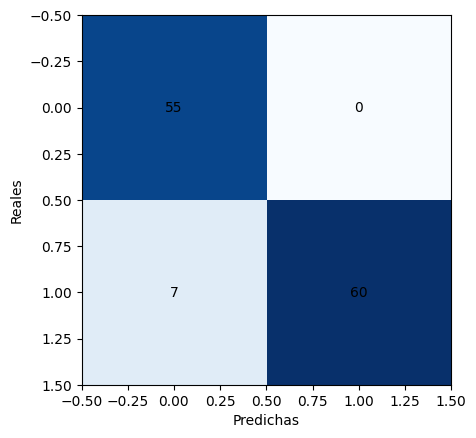

In [28]:
cm = confusion_matrix(reales, labels)
plt.imshow(cm, interpolation='none', cmap="Blues")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va="center")
plt.xlabel('Predichas')
plt.ylabel('Reales')
plt.show()